# SuperstaQ for QSCOUT

Below is a brief tutorial on SuperstaQ optimizations for QSCOUT. For more information on QSCOUT, visit their website [here](https://www.sandia.gov/quantum/quantum-information-sciences/projects/qscout/). For those who'd like to follow along, try the code out on our [Jupyter Hub](https://tinyurl.com/3mbx2r3v).

## Install SuperstaQ packages
For those who do not have SuperstaQ installed on their machine, uncomment the below lines and run to install.

In [1]:
# !pip install cirq-superstaq
# !pip install qiskit-superstaq

## Imports and Token

In [2]:
import os
import numpy as np
import cirq as cirq
import qiskit as qiskit
import cirq_superstaq as css
import qiskit_superstaq as qss

In [3]:
token = <insert token from superstaq.super.tech>"
os.environ["SUPERSTAQ_API_KEY"] = token

## Circuit Compilation

### Cirq

In [4]:
# get service
service = css.Service()

In [5]:
# create circuit
theta = np.random.uniform(0,4*np.pi)
qubits = cirq.LineQubit.range(2)
circuit1 = cirq.Circuit(cirq.CX(qubits[0], qubits[1]),
                           cirq.rz(theta).on(qubits[1]),
                           cirq.CX(qubits[0], qubits[1]),
                           cirq.measure(qubits[0],qubits[1]))

print(circuit1)

0: ───@────────────────@───M───
      │                │   │
1: ───X───Rz(0.608π)───X───M───


In [6]:
# compile with qscout compile
compiler_output = service.qscout_compile(circuit1)
print(compiler_output.circuit)

0: ───PhX(1)^0.5───S^-1───MS(-0.196π)───PhX(-0.5)^0.5───S^-1───M───
                          │                                    │
1: ───PhX(1)^0.5───S^-1───MS(-0.196π)───PhX(-0.5)^0.5───S^-1───M───


In [7]:
# get jaqal program
print(compiler_output.jaqal_program)

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 3.141592653589793 1.5707963267948966
	R allqubits[1] 3.141592653589793 1.5707963267948966
>
<
	Rz allqubits[0] -1.5707963267948966
	Rz allqubits[1] -1.5707963267948966
>
MS allqubits[0] allqubits[1] 0 -1.230073104911105
<
	R allqubits[0] -1.5707963267948966 1.5707963267948966
	R allqubits[1] -1.5707963267948966 1.5707963267948966
>
<
	Rz allqubits[0] -1.5707963267948966
	Rz allqubits[1] -1.5707963267948966
>
measure_all



## Qiskit

In [8]:
# get provider
provider = qss.SuperstaQProvider()

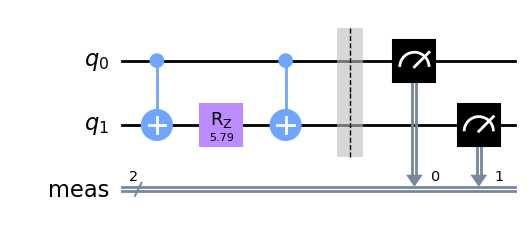

In [9]:
# create circuit
theta = np.random.uniform(0,4*np.pi)
circuit1 = qiskit.QuantumCircuit(2)
circuit1.cx(0,1)
circuit1.rz(theta,1)
circuit1.cx(0,1)
circuit1.measure_all()

# draw circuit
circuit1.draw(output='mpl')

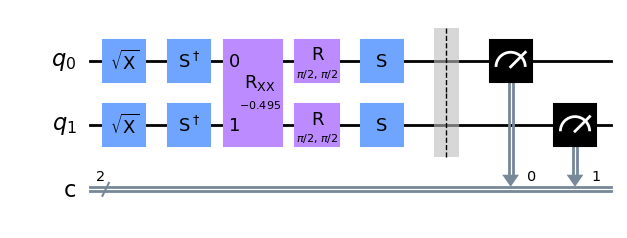

In [10]:
# compile with qscout compile
compiler_output = provider.qscout_compile(circuit1)
compiler_output.circuit.draw('mpl')

In [11]:
# get jaqal program
print(compiler_output.jaqal_program)

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 0.0 1.5707963267948966
	R allqubits[1] 0.0 1.5707963267948966
>
<
	Rz allqubits[0] -1.5707963267948966
	Rz allqubits[1] -1.5707963267948966
>
MS allqubits[0] allqubits[1] 0 -0.49536162766237923
<
	R allqubits[0] 1.5707963267948966 1.5707963267948966
	R allqubits[1] 1.5707963267948966 1.5707963267948966
>
<
	Rz allqubits[0] 1.5707963267948966
	Rz allqubits[1] 1.5707963267948966
>
measure_all



## Multiple Circuits

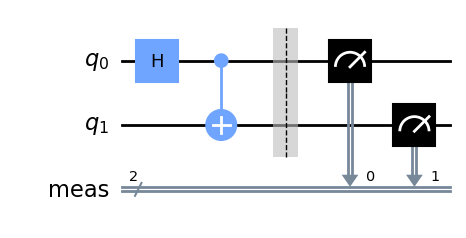

In [12]:
# create second circuit
circuit2= qiskit.QuantumCircuit(2)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.measure_all()

# draw second circuit
circuit2.draw('mpl')

In [13]:
# create list of circuits
circuit_list = [circuit1, circuit2]

# compile list of circuits
compiler_output = provider.qscout_compile(circuit_list)

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 0.0 1.5707963267948966
	R allqubits[1] 0.0 1.5707963267948966
>
<
	Rz allqubits[0] -1.5707963267948966
	Rz allqubits[1] -1.5707963267948966
>
MS allqubits[0] allqubits[1] 0 -0.49536162766237923
<
	R allqubits[0] 1.5707963267948966 1.5707963267948966
	R allqubits[1] 1.5707963267948966 1.5707963267948966
>
<
	Rz allqubits[0] 1.5707963267948966
	Rz allqubits[1] 1.5707963267948966
>
measure_all



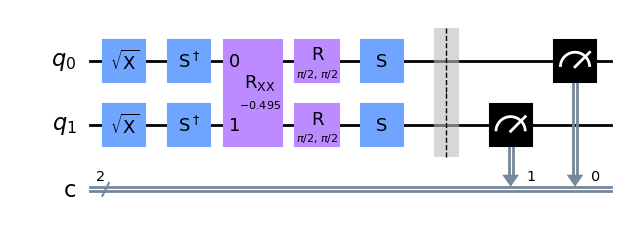

In [14]:
# draw and get jaqal program of first circuit
print(compiler_output.jaqal_programs[0])
compiler_output.circuits[0].draw('mpl')

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 3.141592653589793 2.356194490192345
	R allqubits[1] 3.141592653589793 2.356194490192345
>
MS allqubits[0] allqubits[1] 0 -1.5707963267948966
<
	R allqubits[1] 3.141592653589793 2.356194490192345
	R allqubits[0] -1.5707963267948966 1.5707963267948966
>
Rz allqubits[0] 0.7853981633974476
measure_all



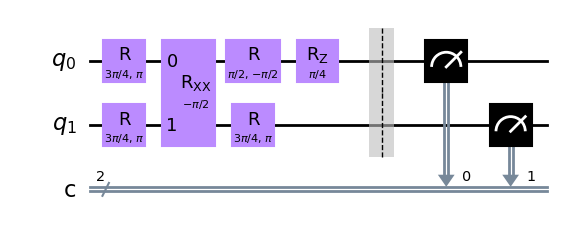

In [15]:
# draw and get jaqal program of second circuit
print(compiler_output.jaqal_programs[1])
compiler_output.circuits[1].draw('mpl')

## Entangling Basis Compilation

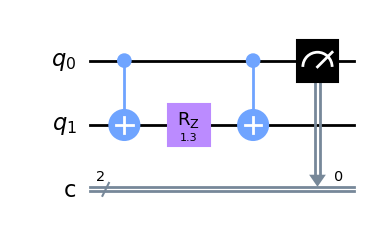

In [16]:
# create circuit
theta = np.random.uniform(0,np.pi)
circuit = qiskit.QuantumCircuit(2,2)
circuit.cx(0,1)
circuit.rz(theta,1)
circuit.cx(0,1)
circuit.measure(0,0)

# draw circuit
circuit.draw(output='mpl')

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 1.5707963267948966 1.5707963267948966
	R allqubits[1] -1.5707963267948966 1.5707963267948966
>
MS allqubits[0] allqubits[1] 0 -1.297097206969112
<
	R allqubits[0] -1.5707963267948966 1.5707963267948966
	R allqubits[1] 1.5707963267948966 1.5707963267948966
>
measure_all



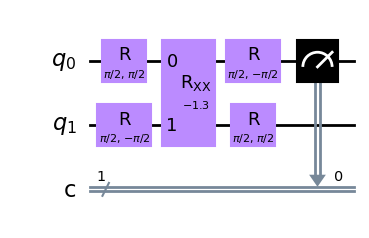

In [17]:
# compile with xx entangling basis
compiler_output = provider.qscout_compile(circuit,base_entangling_gate='xx')

# get jaqal program and draw circuit
print(compiler_output.jaqal_program)
compiler_output.circuit.draw(output='mpl')

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	Rz allqubits[0] -3.141592653589793
	R allqubits[1] 3.141592653589793 3.141592653589793
>
ZZ allqubits[0] allqubits[1] -1.297097206969112
<
	Rz allqubits[0] -3.141592653589793
	R allqubits[1] 3.141592653589793 3.141592653589793
>
measure_all



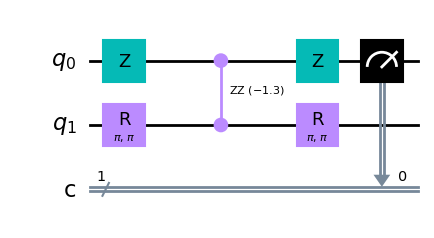

In [18]:
# compile with zz entangling basis
compiler_output = provider.qscout_compile(circuit,base_entangling_gate='zz')

# get jaqal program and draw circuit
print(compiler_output.jaqal_program)
compiler_output.circuit.draw(output='mpl')

## Swap Mirroring

### Create random QV circuit

In [19]:
# get random two-qubit circuit
circ = qiskit.circuit.library.QuantumVolume(2,1,seed=123)
circ.measure_all()

### Compile without swap mirroring

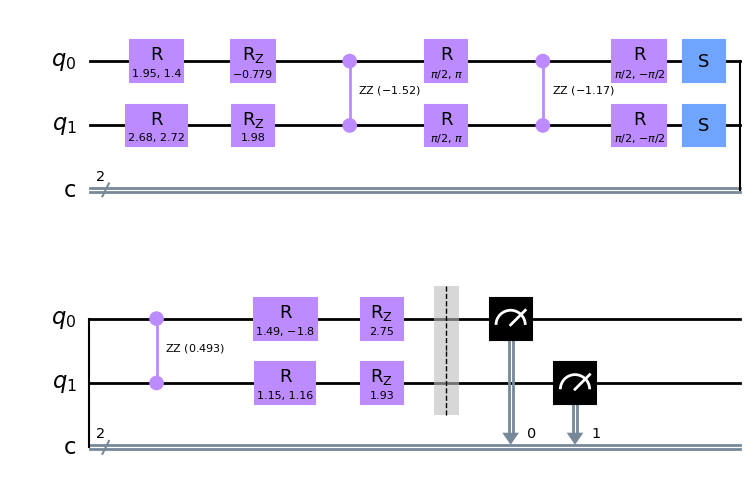

In [20]:
# no swap mirroring compile
circ_nsm = provider.qscout_compile(circ,mirror_swaps=False,base_entangling_gate='zz')

# draw circuit
circ_nsm.circuit.draw('mpl', fold=10)

### Compile with swap mirroring

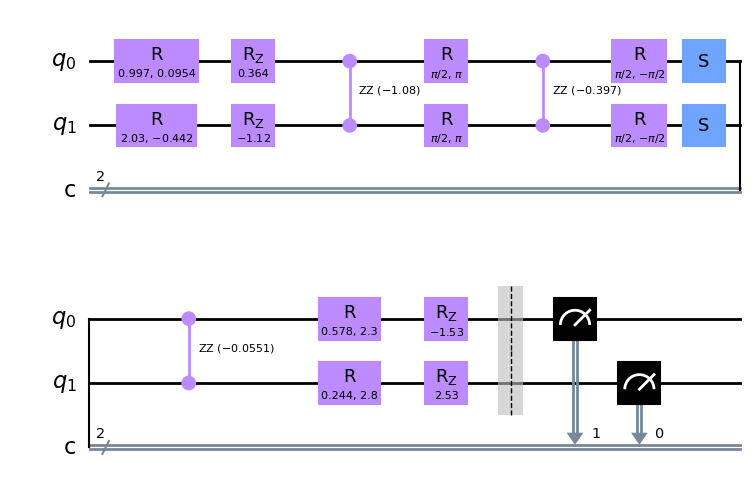

In [21]:
# swap mirroring compile
circ_nsm = provider.qscout_compile(circ,mirror_swaps=True,base_entangling_gate='zz')

# draw circuit
circ_nsm.circuit.draw('mpl', fold=10)

## Simulator

In [22]:
superstaq = qss.superstaq_provider.SuperstaQProvider()
backend = superstaq.get_backend("sandia_qscout_qpu")
qc = qiskit.QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
job = backend.run(qc, shots=100, method="dry-run")
print(job.result().get_counts())

{'00': 49, '11': 51}
